In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import pickle
import itertools

import statsmodels.api as sm
from scipy import interpolate

In [3]:
reg=['604','595']
inst=['I','T']
lin=['H','N','O','S']
sam=['A','B','C']
ms=['H','V']

In [4]:
n=7
pc=4.16
tl="24"

In [5]:
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

In [6]:
rg='604\\'
r=0
i=0
l=0
s=0
m=0

datat=reg[r]+inst[i]+lin[l]+sam[s]+ms[m]
datat

'604IHAH'

In [7]:
#folder=reg[r]+'//'+inst[i]+'//'+lin[l]+'//'+sam[s]+'//'+ms[m]
#folder

In [8]:
os.mkdir(rg+datat)

Structure Function

In [9]:
xi=1
xf=13

In [10]:
pickle_in = open('Datos\\'+datat+'//'+'S.pkl',"rb")
SF = pickle.load(pickle_in)
datax=SF

In [11]:
SFData=dict()
SFD=dict()

for i in range(n):
    al=np.log10(datax[i].Lag)
    bl=np.log10(datax[i].Nmqvd)
    cl=np.log10(datax[i].ErrY)
    x,y,z=np.array(al[xi:xf]),np.array(bl[xi:xf]),np.array(cl[xi:xf])
    x = sm.add_constant(x)
    #model = sm.OLS(y, x)
    model = sm.WLS(y, x,weights=1./(z**2))
    SFData[i] = model.fit()
    SFD[i]=[SFData[i].params[1],SFData[i].bse[1],SFData[i].params[0],SFData[i].bse[0],
         SFData[i].rsquared,datax[i].Lag[xi],datax[i].Lag[xf]]
    #SFD[i]=pd.DataFrame(XX).T

SFD=pd.DataFrame(SFD).T
SFD.rename(columns={0:'A',1:'DA',2:'B',3:'DB',4:'C',5:'E',6:'F'}, inplace=True)
SFD.loc['Promedio'] = SFD.mean()
SFD

,A,DA,B,DB,C,E,F
0,0.569351,0.019119,1.544364,0.019639,0.988849,3.0,20.99558
1,0.549304,0.018658,1.558472,0.019260,0.988594,3.0,20.99558
2,0.548434,0.018758,1.557817,0.019359,0.988436,3.0,20.99558
3,0.545278,0.018861,1.557307,0.019467,0.988177,3.0,20.99558
4,0.472700,0.022898,1.597088,0.023940,0.977072,3.0,20.99558
5,0.420567,0.025585,1.632103,0.026875,0.964313,3.0,20.99558
6,0.422128,0.025893,1.628602,0.027243,0.963739,3.0,20.99558
Promedio,0.503966,0.021396,1.582251,0.022255,0.979883,3.0,20.99558


In [12]:
SFD=SFD.round(decimals=3)
SFDx=(SFD.groupby(SFD.columns.str[-1], axis=1).apply(lambda x: x.astype(str).apply('$\pm$'.join, 1)))
SFres=SFDx[['A','B','C']].copy()

In [13]:
SFres=SFres.assign(D=SFD.E*pc)
SFres=SFres.assign(E=SFD.F*pc)

In [14]:
SFres.rename(columns={'A':'$\\alpha$','B':'$\epsilon$','C':'R','D':'L$_{0}$ [pc]','E':'L$_{F}$ [pc]'}, inplace=True)

In [15]:
SFres=SFres.round(decimals=3)
SFres

,$\alpha$,$\epsilon$,R,L$_{0}$ [pc],L$_{F}$ [pc]
0,0.569$\pm$0.019,1.544$\pm$0.02,0.989,12.48,87.343
1,0.549$\pm$0.019,1.558$\pm$0.019,0.989,12.48,87.343
2,0.548$\pm$0.019,1.558$\pm$0.019,0.988,12.48,87.343
3,0.545$\pm$0.019,1.557$\pm$0.019,0.988,12.48,87.343
4,0.473$\pm$0.023,1.597$\pm$0.024,0.977,12.48,87.343
5,0.421$\pm$0.026,1.632$\pm$0.027,0.964,12.48,87.343
6,0.422$\pm$0.026,1.629$\pm$0.027,0.964,12.48,87.343
Promedio,0.504$\pm$0.021,1.582$\pm$0.022,0.98,12.48,87.343


In [16]:
SFres.to_latex(rg+datat+'//'+'a.tex', escape=False, caption=datat+'a')

In [17]:
SFdisc = SFD[['A','DA']].copy()

In [18]:
exp1=2/3
SFdisc=SFdisc.assign(B=((SFD.A-exp1)/exp1)*100)

exp2=5/3
SFdisc=SFdisc.assign(C=((SFD.A-exp2)/exp2)*100)

In [19]:
#SFdisc

In [20]:
#print(SFData[0].summary())

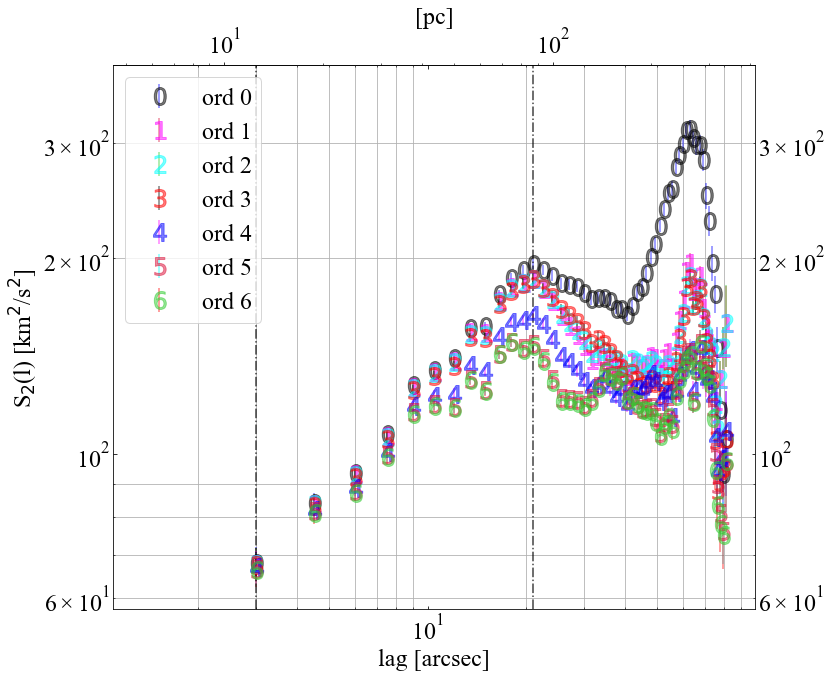

In [21]:

#dt=SFPr

yi=xi
yf=xf

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

#marker=itertools.cycle(('o','^','s','h','*','p','v'))
#color=itertools.cycle(('b','y','r','c','m','k','g'))

mx=datax[0].iloc[:,1].max()*1.25
mn=datax[0].iloc[1,1]*0.85

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=18, label='ord ' + str(i))
    
#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
plt.ylim(mn,mx)
#########################################################
plt.axvline(x=datax[0].iloc[xi,0], color='k', linestyle='-.', alpha=0.75)
plt.axvline(x=datax[0].iloc[xf,0], color='k', linestyle='-.', alpha=0.75)

def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl
fig.savefig(rg+datat+'//'+'S.pdf')

Structure Function Norm

In [22]:
pickle_in = open('Datos\\'+datat+'//'+'SN.pkl',"rb")
SFN = pickle.load(pickle_in)
datax=SFN

In [23]:
SFNData=dict()


for i in range(n):
    x=SFN[i]['Lag']*pc
    y=SFN[i]['Nmqvd']-2
    tck=interpolate.splrep(x,y,s=0)
    grid=np.linspace(x.min(),x.max(),num=len(x))
    ynew=interpolate.splev(grid,tck,der=0)

    inter=pd.DataFrame([grid,ynew]).T
    SFNData[i]=interpolate.sproot(tck)

In [24]:
SFND=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in SFNData.items() ])).T
SFND.rename(columns={0:'1',1:'2',2:'3',3:'4',4:'5',5:'6',6:'7',7:'8',8:'9',9:'10'}, inplace=True)
SFND=SFND.round(decimals=0)

SFND

,1,2,3,4,5,6,7,8,9,10
0,70.0,121.0,185.0,311.0,NaN,NaN,NaN,NaN,NaN,NaN
1,53.0,123.0,237.0,304.0,332.0,NaN,NaN,NaN,NaN,NaN
2,53.0,126.0,240.0,298.0,332.0,NaN,NaN,NaN,NaN,NaN
3,54.0,145.0,241.0,295.0,NaN,NaN,NaN,NaN,NaN,NaN
4,53.0,123.0,142.0,145.0,196.0,204.0,242.0,266.0,273.0,288.0
5,53.0,104.0,134.0,166.0,237.0,267.0,271.0,303.0,NaN,NaN
6,52.0,103.0,134.0,167.0,237.0,267.0,271.0,302.0,NaN,NaN


https://stackoverflow.com/questions/19736080/creating-dataframe-from-a-dictionary-where-entries-have-different-lengths

In [25]:
SFND.to_latex(rg+datat+'//'+'b.tex', escape=False, caption=datat+'b')

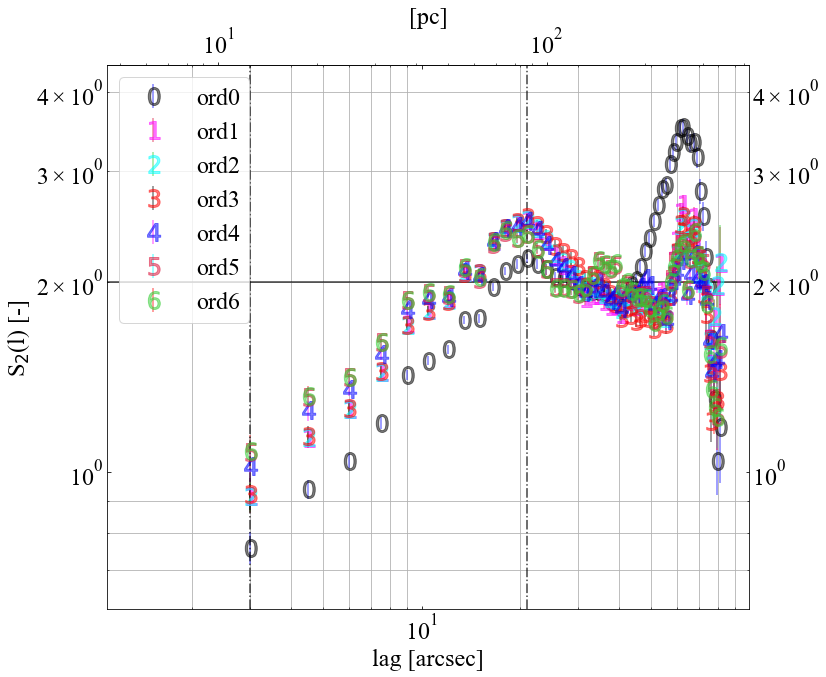

In [26]:
#dt=SFNPr

yi=xi
yf=xf

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

mx=datax[0].iloc[:,1].max()*1.25
mn=datax[0].iloc[1,1]*0.8

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=18, label='ord' + str(i))

#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
plt.ylim(mn,mx)
#########################################################
plt.axvline(x=datax[0].iloc[xi,0], color='k', linestyle='-.', alpha=0.75)
plt.axvline(x=datax[0].iloc[xf,0], color='k', linestyle='-.', alpha=0.75)
plt.axhline(y=2, color='k', linestyle='-', alpha=0.75)


def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

fig.savefig(rg+datat+'//'+'SN.pdf')

Structure Function WH

In [27]:
xi=0
xf=30

In [28]:
pickle_in = open('Datos\\'+datat+'//'+'SH.pkl',"rb")
SFH = pickle.load(pickle_in)
datax=SFH

In [29]:
SFHData=dict()
SFHD=dict()

for i in range(n):
    al=np.log10(datax[i].Lag)
    bl=np.log10(datax[i].Nmqvd)
    cl=np.log10(datax[i].ErrY)
    x,y,z=np.array(al[xi:xf]),np.array(bl[xi:xf]),np.array(cl[xi:xf])
    x = sm.add_constant(x)
    #model = sm.OLS(y, x)
    model = sm.WLS(y, x,weights=1./(z**2))
    SFHData[i] = model.fit()
    SFHD[i]=[SFHData[i].params[1],SFHData[i].bse[1],SFHData[i].params[0],SFHData[i].bse[0],
         SFHData[i].rsquared,datax[i].Lag[xi],datax[i].Lag[xf]]
    #SFD[i]=pd.DataFrame(XX).T

SFHD=pd.DataFrame(SFHD).T
SFHD.rename(columns={0:'A',1:'DA',2:'B',3:'DB',4:'C',5:'E',6:'F'}, inplace=True)
SFHD.loc['Promedio'] = SFHD.mean()
SFHD

,A,DA,B,DB,C,E,F
0,0.565523,0.015665,1.572452,0.016531,0.978968,2.964648,20.99252
1,0.503056,0.015975,1.609083,0.016946,0.972539,2.964648,20.99252
2,0.495673,0.016517,1.612155,0.017527,0.969847,2.964648,20.99252
3,0.510626,0.016526,1.606000,0.017525,0.971508,2.964648,20.99252
4,0.459796,0.019711,1.630252,0.021067,0.951062,2.964648,20.99252
5,0.355375,0.022408,1.701762,0.024072,0.899826,2.964648,20.99252
6,0.359247,0.022476,1.699534,0.024143,0.901228,2.964648,20.99252
Promedio,0.464185,0.018468,1.633034,0.019687,0.949282,2.964648,20.99252


In [30]:
SFdisc=SFdisc.assign(D=((SFHD.A-SFD.A)/SFD.A)*100)
SFdisc.loc['Promedio'] = SFdisc.mean()

In [31]:
SFdisc

,A,DA,B,C,D
0,0.569000,0.0190,-14.65000,-65.8600,-0.611084
1,0.549000,0.0190,-17.65000,-67.0600,-8.368744
2,0.548000,0.0190,-17.80000,-67.1200,-9.548637
3,0.545000,0.0190,-18.25000,-67.3000,-6.307226
4,0.473000,0.0230,-29.05000,-71.6200,-2.791475
5,0.421000,0.0260,-36.85000,-74.7400,-15.587979
6,0.422000,0.0260,-36.70000,-74.6800,-14.870429
Promedio,0.503875,0.0215,-24.41875,-69.7675,-8.248171


In [32]:
SFdisc=SFdisc.round(decimals=3)
SFdiscx=(SFdisc.groupby(SFdisc.columns.str[-1], axis=1).apply(lambda x: x.astype(str).apply('$\pm$'.join, 1)))
SFdis=SFdiscx[['A','B','C','D']].copy()
SFdis.rename(columns={'A':'$\\alpha$','B':'2/3','C':'5/3','D':'SF$_{WH}$'}, inplace=True)

In [33]:
SFdis

,$\alpha$,2/3,5/3,SF$_{WH}$
0,0.569$\pm$0.019,-14.65,-65.86,-0.611
1,0.549$\pm$0.019,-17.65,-67.06,-8.369
2,0.548$\pm$0.019,-17.8,-67.12,-9.549
3,0.545$\pm$0.019,-18.25,-67.3,-6.307
4,0.473$\pm$0.023,-29.05,-71.62,-2.791
5,0.421$\pm$0.026,-36.85,-74.74,-15.588
6,0.422$\pm$0.026,-36.7,-74.68,-14.87
Promedio,0.504$\pm$0.022,-24.419,-69.768,-8.248


In [34]:
SFdis.to_latex(rg+datat+'//'+'c.tex', escape=False, caption=datat+'c')

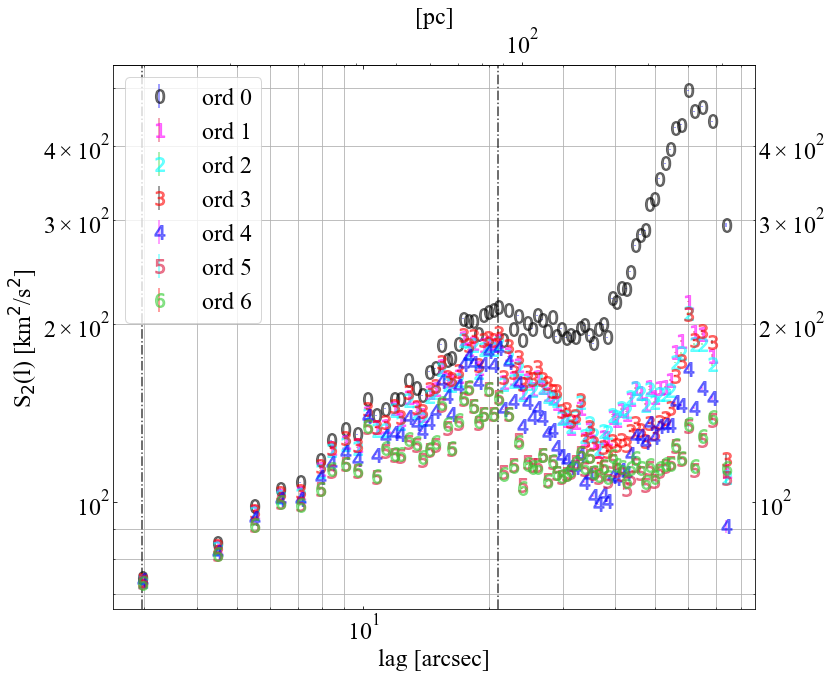

In [35]:
#dt=SFwh1Pr

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

mx=datax[0].iloc[:,1].max()*1.25
mn=datax[0].iloc[1,1]*0.6

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=14, label='ord ' + str(i))

#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
#plt.ylim(mn,mx)
#########################################################
plt.axvline(x=datax[0].iloc[xi,0], color='k', linestyle='-.', alpha=0.75)
plt.axvline(x=datax[0].iloc[xf,0], color='k', linestyle='-.', alpha=0.75)

def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

fig.savefig(rg+datat+'//'+'SWH.pdf')

Auto correlation Function

In [36]:
pickle_in = open('Datos\\'+datat+'//'+'AF.pkl',"rb")
AF = pickle.load(pickle_in)

In [37]:
AFData=dict()

for i in range(n):
    x=AF[i]['Lag']*pc
    y=AF[i]['Nmqvd']
    tck=interpolate.splrep(x,y,s=0)
    grid=np.linspace(x.min(),x.max(),num=len(x))
    ynew=interpolate.splev(grid,tck,der=0)

    inter=pd.DataFrame([grid,ynew]).T
    AFData[i]=interpolate.sproot(tck)

In [38]:
AFD=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in AFData.items() ])).T
AFD.rename(columns={0:'1',1:'2',2:'3',3:'4',4:'5',5:'6',6:'7',7:'8',8:'9',9:'10'}, inplace=True)
AFD=AFD.round(decimals=0)
AFD

,1,2,3,4,5,6,7,8,9,10
0,69.0,127.0,188.0,316.0,NaN,NaN,NaN,NaN,NaN,NaN
1,53.0,121.0,218.0,225.0,237.0,290.0,NaN,NaN,NaN,NaN
2,54.0,122.0,242.0,294.0,298.0,308.0,324.0,329.0,NaN,NaN
3,54.0,126.0,237.0,306.0,NaN,NaN,NaN,NaN,NaN,NaN
4,53.0,115.0,191.0,229.0,235.0,263.0,274.0,282.0,296.0,334.0
5,51.0,103.0,144.0,170.0,236.0,263.0,273.0,306.0,313.0,329.0
6,51.0,103.0,143.0,172.0,236.0,264.0,272.0,305.0,314.0,330.0


In [39]:
AFD.to_latex(rg+datat+'//'+'d.tex', escape=False, caption=datat+'d')

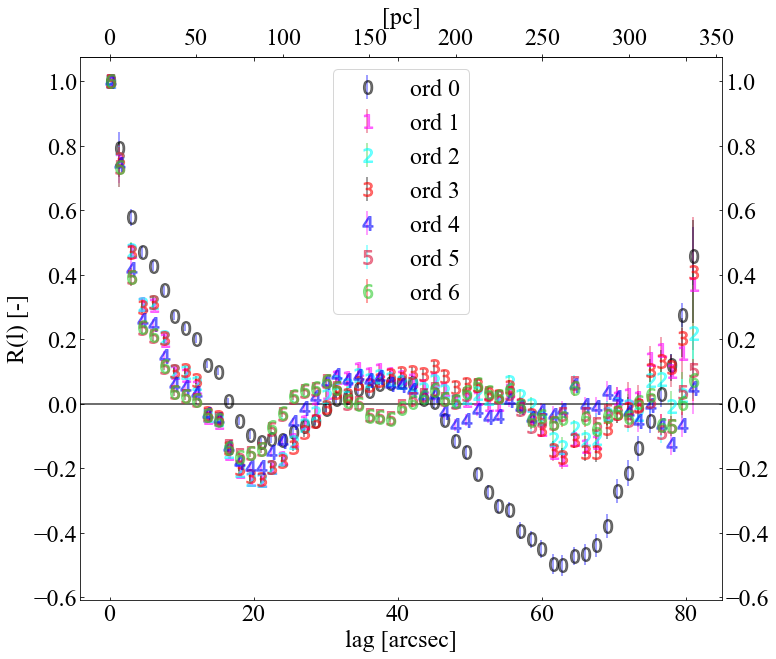

In [40]:
datax=AF
#dt=SFwh1Pr

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

#mx=datax[0].iloc[:,1].max()*1.25
#mn=datax[0].iloc[1,1]*0.6

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=14, label='ord ' + str(i))

#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

#ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='R(l) [-]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
#plt.ylim(mn,mx)
#########################################################
plt.axhline(y=0, color='k', linestyle='-', alpha=0.75)
#plt.axvline(x=datax[0].iloc[xf-1,0], color='k', linestyle='-.', alpha=0.75)

def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

plt.savefig(rg+datat+'//'+'AC.pdf')

In [41]:
#os.mkdir(rg+datat)

In [42]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 14.495819568634033 seconds ---
